## Como aplicar Machine Learning para reduzir o Churn

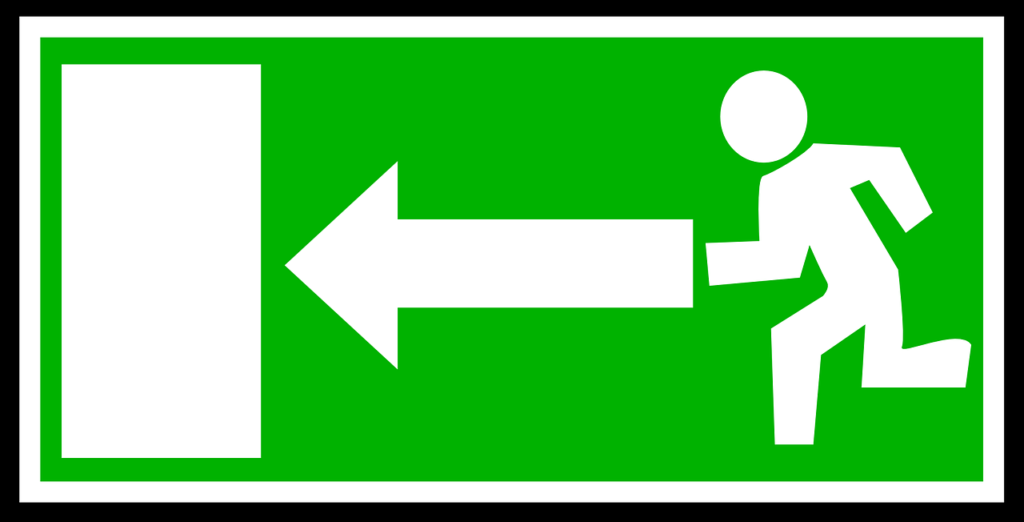

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar as decisões.

---



*“Seus clientes mais insatisfeitos são sua maior fonte de aprendizado” (Bill Gates).*

---



A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.  Mas quais são as características que leva um cliente a dar o Churn?

Para esse projeto de Data Science seguiremos essas etapas

1. Entendimento do Problema
2. Obtenção dos dados
3. Análise Exploratória e Visualização dos dados
4. Pré-processamento
5. Modelos de Machine Learning
6. Avaliação do modelo

Primeiro, entendemos o problema de Churn e estabelecemos os objetivos,

1. Identificar o perfil dos clientes que deram Churn.
2. Identificar os clientes em risco de Churn.

# Obtenção do conjunto de dados
 Os dados utilizados aqui foram extraídos do [Kaggle](https://www.kaggle.com/datasets/shubh0799/churn-modelling) e são dados de clientes de uma agência bancária. Utilizaremos o Google Colab, o python na nuvem, para fazer as análises.

 

# Importando o Conjunto de dados
Para fazer as análise é necessário ter um conjunto de dados, assim precisamos importar a biblioteca pandas para processar os dados.

In [ ]:
#Importando a biblioteca pandas
import pandas as pd
##Importando o dataset
df= pd.read_csv('/content/drive/MyDrive/Projetos Data Science /Churn_Modelling.csv') #importando um arquivo csv 
df.head(10) #visualizando as 10 primeiras linhas do dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0




---


No conjunto de dados temos as seguinte variáveis:

* CustomerId: identificação do cliente;
* Surname: sobrenome do cliente;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).

# Análise Exploratória dos dados – Visão geral do conjunto de dados
Nessa etapa, iremos

1. Identificar o tipo de cada variável (numérica, categórica, temporal)
2. Identificar qual é a variável target (alvo) para o nosso problema
3. Exploração dos dados (medidas descritivas, distribuição das variáveis)
4. Visualizar os dados para identificar o perfil dos clientes que deram Churn

1. Identificando as variáveis presentes no conjunto de dados
Nessa etapa, o interesse é obter algumas informações sobre as variáveis, para isso utilizamos o método

In [ ]:
pd.DataFrame.info(df);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




---


Temos 14 variáveis e 10000 observações no dataset, além disso, temos variáveis do tipo inteiro, reais e objeto. Os dados se enquadram em duas categorias:

* Variáveis categóricas: sexo, país, cartão de crédito, clientes ativos e saída do cliente.
* Variáveis numéricas: escore do cliente, idade, tenure, balance, número de produtos, salário estimado.



---


2. Identificando a variável alvo

Nosso interesse é identificar o perfil de clientes que cancelaram o serviço com agência bancária e tentar prever clientes em risco de Churn. Assim a variável ‘Exited’ é a variável adequada para alcançar os objetivos propostos.



---


3. Análise exploratória dos dados
O comando ‘describe()’ fornece algumas medidas descritivas das variáveis, como média, mediana (quartil 50%), máxima, mínimo, desvio padrão, quartis e a contagem

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Os clientes, dessa agência bancária, têm em média 39 anos, sendo a idade mínima de 18 anos e máxima de 92 anos. A pontuação de crédito fica em torno de 650 pontos e o índice médio de estabilidade de emprego é 5.

Os clientes têm em média $76.000 mil dólares na conta e possuem em média 1,5 produtos do banco. O salário médio anual estimado é de $100.000 mil dólares, 70% dos clientes possuem cartão de crédito e apenas 51% são ativos no banco, ou seja, fazem movimentação bancária constantemente.

Analisando a variável de Churn (‘Exited’), observa-se que 20% dos clientes romperam seu contrato com a agência bancária.


---



### Distribuição das variáveis
Plotar a distribuição de cada variável, dá uma visão geral da mesma e possíveis outilers (valores discrepantes).

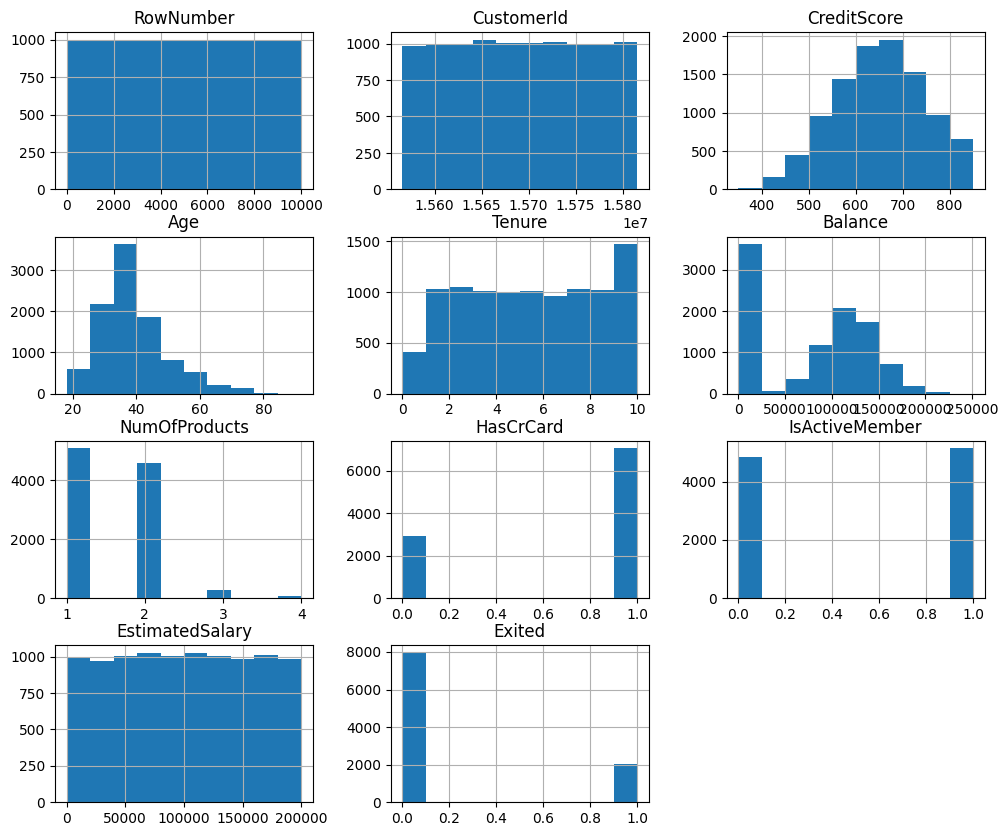

In [ ]:
df.hist(figsize=(12,10));

Pelos histogramas concluímos:

* A variável Idade possui uma distribuição assimétrica a esquerda, ou seja, a maioria dos clientes têm entre 30 a 45 anos e poucos clientes têm idade superior a 60 anos.
* A  distribuição da variável Balance (saldo bancário), mostra uma inflação de clientes que têm pouco dinheiro na conta bancária, isso pode ser um indicativo que esses clientes possuem outra conta bancária.
* A distribuição da variável Score do Cliente mostra uma leve assimetria a direita, indicando que os clientes têm um escore elevado.
* A distribuição da variável Salário Estimado mostra que os valores estão uniformemente distribuídos. Ou seja, temos frequência parecidas entre os salários dos clientes e existem clientes com salários baixo, médio e alto.
* A distribuição da variável Tenure (índice de estabilidade de emprego), mostra uma alta frequência no índice 10, ou seja, muitos clientes têm uma estabilidade alta. E uma baixa frequência no índice 0, de baixa estabilidade.
* A distribuição da variável Número de Produtos indica que a maioria dos clientes têm 1 ou 2 produtos e poucos clientes têm 3 ou mais produtos.
* A distribuição da variável Cartão de Crédito, indica que a maioria dos clientes possuem cartão de crédito.
* A distribuição da variável Membro Ativo, mostra que temos um equilíbrio entre os clientes que movimentam a conta e os clientes que não possuem esse hábito de movimentar a conta.
* E para finalizar, observa-se que poucos clientes cancelaram sua conta bancária (variável Exited).

Viu quanta informação conseguimos extrair da distribuição de frequência das variáveis.

---



### Variáveis Numéricas
Agora vamos observar as distribuições de cada variável numérica em relação à variável resposta (alvo). Podemos observar que:
* A evasão de clientes (cor rosa) é maior em pessoas com mais idade e com baixo escore.
* E quanto maior o número de produtos bancários, maior a taxa de evasão.

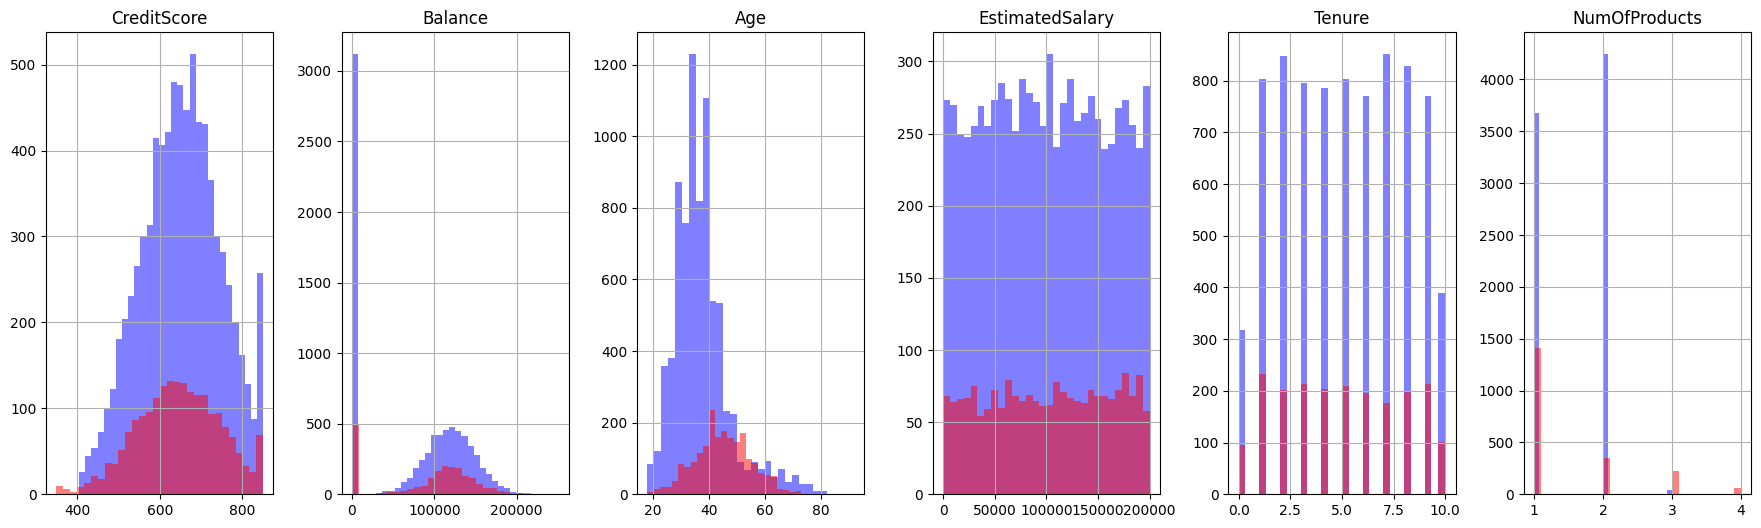

In [ ]:
import matplotlib.pyplot as plt

df['Exited_cat']=df['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);



---


4. Visualização de Dados – Qual o perfil de clientes que cancelaram o contrato (Churn)?

---



Nessa etapa faremos a análise visual dos dados e mostraremos como as técnicas gráficas são úteis para identificar as características dos clientes que cancelaram o serviço. Para construir os gráficos no Python, precisamos importar algumas bibliotecas

In [ ]:
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;
import matplotlib.pyplot as plt#visualização de dados;

Para facilitar a configuração das cores dos gráficos, defini uma paleta de cores. Você pode utilizar as cores default dos gráfico, mas eu prefiro definir algumas cores que são mais agradáveis, ao meu ver.

In [ ]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [ ]:
# porcentagem de clientes que sairam do banco
df['Exited'].sum()/df['Exited'].count()

0.2037

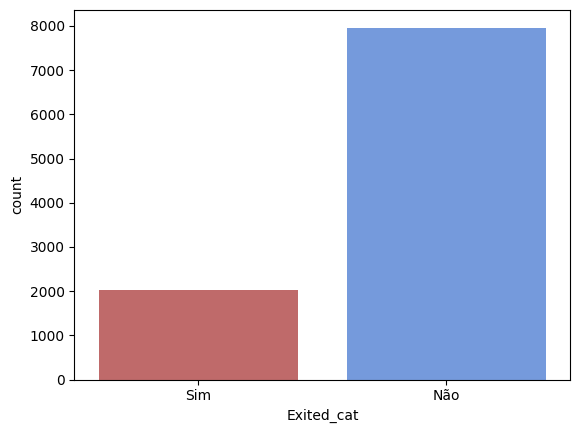

In [ ]:
sns.countplot(data=df,x='Exited_cat',palette=cols);

Observe que 20% dos clientes dessa agência bancária abandonaram o serviço. Vale ressaltar que existe um desbalanceamento em relação a variável de interesse, Exited. E ignorar essa desproporção, entre as classes, pode impactar os resultados da previsão do modelo, que será assunto para o próximo artigo.

### Variáveis Categóricas
Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim. E os códigos para gerar os gráficos são:

Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

* Variável Sexo


In [ ]:
#renomeando as categorias
df['Gender']=df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])

In [ ]:
df_plot = df.groupby ('Gender'). Exited.mean (). reset_index () 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


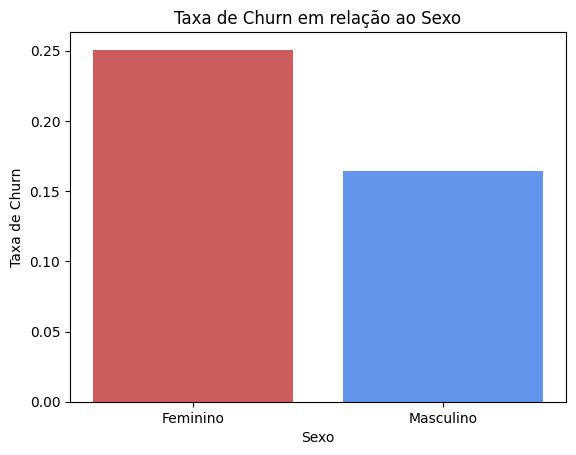

In [ ]:
#Sexo em relação a variável churn
x =df_plot['Gender']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');
     

Observa-se que as mulheres têm um risco maior de Churn do que os homens.

* Variável País

In [ ]:
df['Geography']=df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


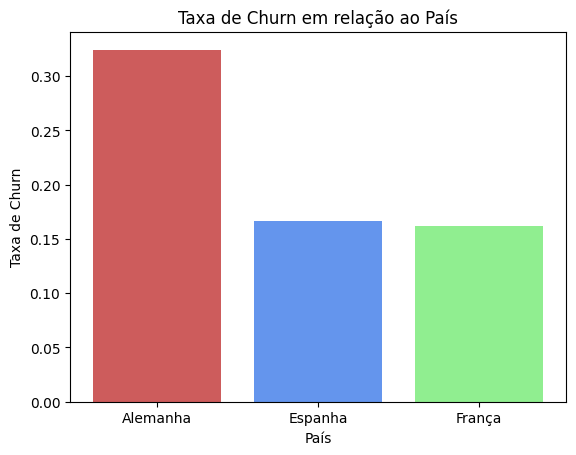

In [ ]:
#País em relação a variável churn
x =df_plot['Geography']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

Em relação a variável país, observa-se que a porcentagem de Churn na Alemanha é bastante elevada, onde 32% dos clientes encerraram a conta no banco. Espanha e França têm uma taxa de Churn parecidas em torno de 16%.

* Variável Cartão de Crédito

In [ ]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


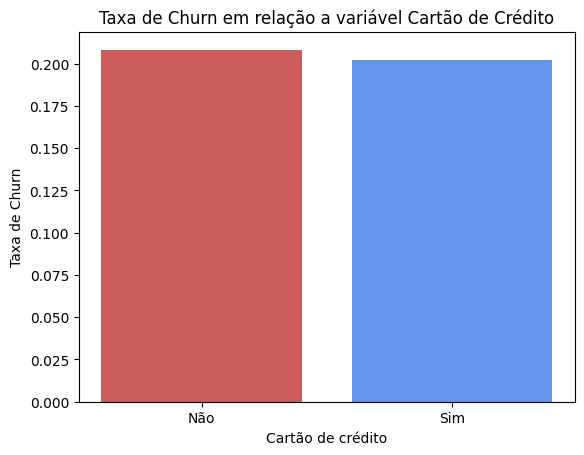

In [ ]:
#Carão de crédito em relação a variável churn
x =df_plot['HasCrCard']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.

* Variável Membro Ativo

In [ ]:
df['IsActiveMember']=df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


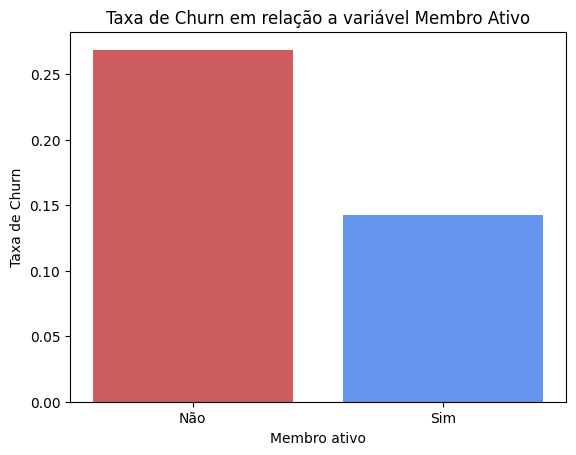

In [ ]:
#Membro ativo em relação a variável churn
x =df_plot['IsActiveMember']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

O Churn entre os clientes que não são ativos é maior do que os clientes ativos, tendo uma diferença de aproximadamente 12%.

Resumindo: 

* As mulheres têm um risco maior de Churn do que os homens.
* A porcentagem de Churn na Alemanha é bastante elevada, onde 32% dos clientes encerraram a conta no banco.
Espanha e França têm uma taxa de Churn parecidas em torno de 16%.
* O cliente ter ou não cartão de crédito parece não influenciar no Churn.
* A taxa de Churn é maior entre os clientes que não são ativos do que os clientes ativos, tendo uma diferença de aproximadamente 12%.

### Variáveis numéricas
Para as variáveis numéricas utilizaremos variáveis de barras para variáveis discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis. Selecionamos, primeiramente, apenas as variáveis numéricas e depois analisamos as correlações entre essas variáveis.

In [ ]:
df_cont=df[['Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]
df_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


* Matriz de Correlação

Utilizaremos a função heatmap() para entender o relacionamento entre as variáveis numéricas.

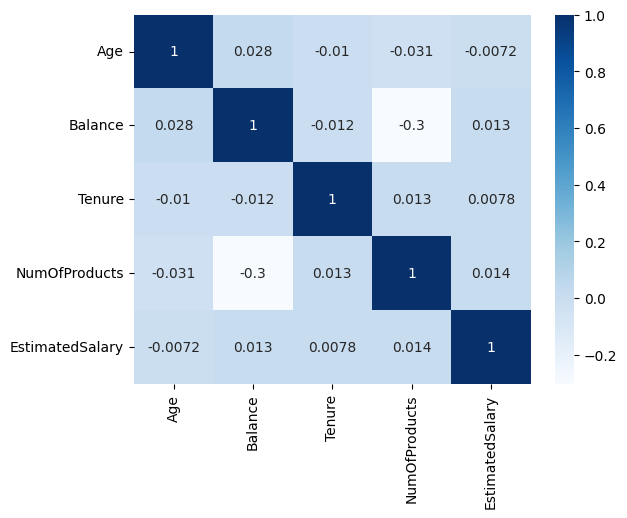

In [ ]:
sns.heatmap(df_cont.corr(),annot = True,
            cmap='Blues');

Analisando a correlação entre as variáveis, observa-se que temos baixas correlações. A maior correlação é entre as variáveis Número de Produtos e Saldo Bancário ('Balance') e temos uma correlação negativa de - 0,3 entre elas. Ou seja, quando menor o Número de Produtos maior o Saldo Bancário.

Agora vamos construir os gráficos para as variáves quantitativas discretas, como, 'NumOfProducts' e 'Tenure'.

* Variável Número de Produtos

In [ ]:
df_plot = df.groupby ('NumOfProducts').Exited.mean(). reset_index () 
df_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


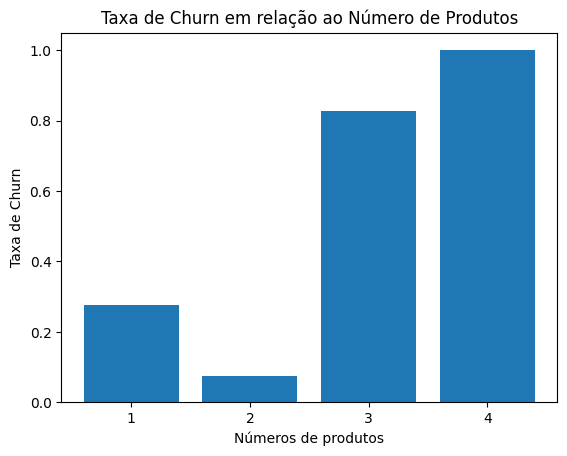

In [ ]:
#Número de produtos em relação a variável churn
x =df_plot['NumOfProducts']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Número de Produtos');
plt.xlabel('Números de produtos');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (1,2,3,4));

Quanto maior o número de produtos maior a taxa de Churn.

**Observação:Para alterar o eixo do gráfico utilize a função plt.xticks**

* Variável Tenure

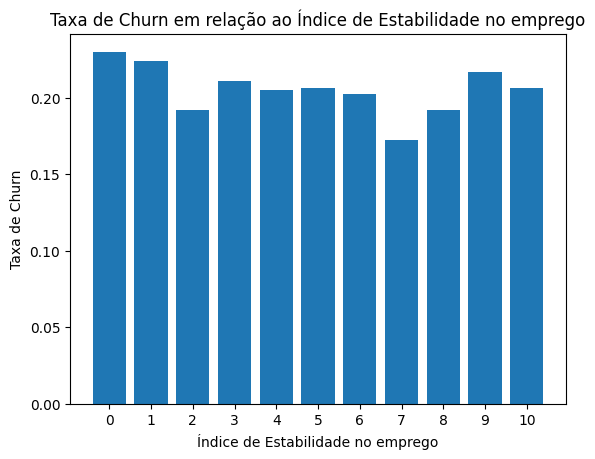

In [ ]:
df_plot = df.groupby ('Tenure'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x =df_plot['Tenure']
y=df_plot['Exited']
plt.bar(x,y);
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego');
plt.xlabel('Índice de Estabilidade no emprego');
plt.ylabel('Taxa de Churn');
plt.xticks(x, (0,1,2,3,4,5,6,7,8,9,10));

O nível de estabilidade do emprego parece não influenciar a taxa de Churn. Porém, observa-se uma taxa de Churn um pouco mais elevada em clientes com índice de estabilidade 0 e 1.

* Variável Saldo Bancário

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64

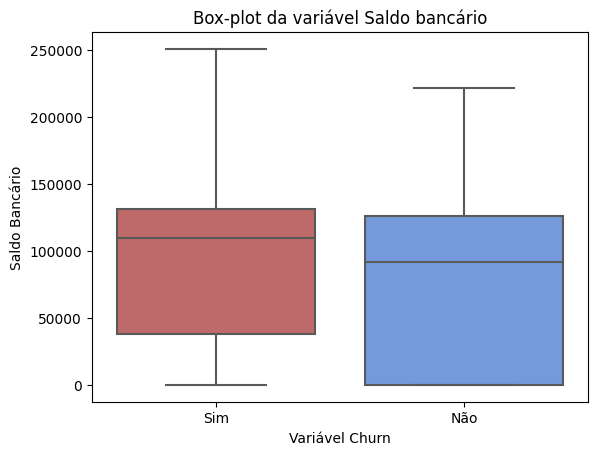

In [ ]:
#box-plot salto bancario em relação ao Churn
cols= [myred, myblue,mygreen]
sns.boxplot(x="Exited_cat", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited_cat'])['Balance'].mean()

Clientes que cancelaram os serviços bancários possui um saldo bancários maior do que aqueles clientes que não cancelaram o serviço.

* Variável Salário Estimado

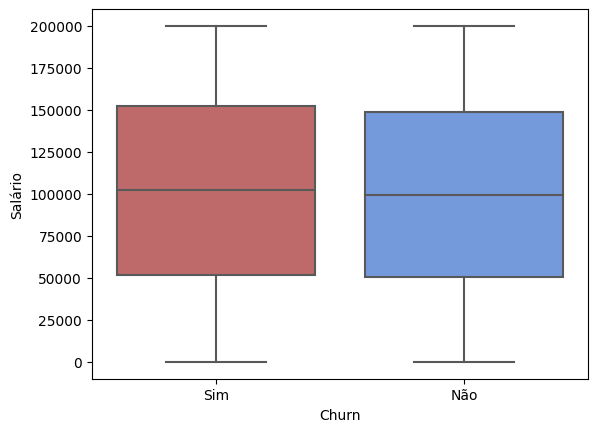

In [ ]:
#box-plot salario pela variável churn

sns.boxplot(x="Exited_cat", y="EstimatedSalary" , data=df,palette=cols);
df.groupby(['Exited'])['EstimatedSalary'].mean()
plt.xlabel('Churn');
plt.ylabel('Salário');
     

O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.

* Clientes que cancelaram os serviços bancários possui um saldo bancários maior do que aqueles clientes que não cancelaram o serviço.
* O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.
* Clientes que cancelaram o serviço têm uma idade maior do que os clientes que não cancelaram o serviço. E  observa-se a presença de outliers (pontos discrepantes).
* A variável pontuação de crédito no geral não possui grandes diferença em relação ao Churn de clientes.
* O box-plot dos clientes que cancelaram o serviço, possuí observações outliers na parte inferior e um limite inferior menor do que o boxplot dos clientes que não cancelaram o contrato. Indicando assim, que clientes que cancelaram o serviço possuem um score menor do que os clientes que não cancelaram o serviço.

Nas variáveis quantitativas contínuas podemos construir gráficos de dispersão para analisar a relação entre a taxa de Churn e as variáveis contínuas. Quando observamos o gráfico de dispersão da taxa de Churn em relação a pontuação de crédito, essa evidência fica mais clara, a taxa de Churn é maior entre os clientes com baixo escore de crédito. Ou seja, clientes com alto risco de serem inadimplentes também tem uma propensão maior de Churn.

Pelo gráfico de dispersão, entre a taxa de Churn e a idade, observa-se que pessoas entre 50 e 60 anos tem uma alta taxa de Churn e clientes com mais de 75 anos tem risco quase zero de abandonar os serviços bancários.

Text(0, 0.5, 'Taxa de Churn')

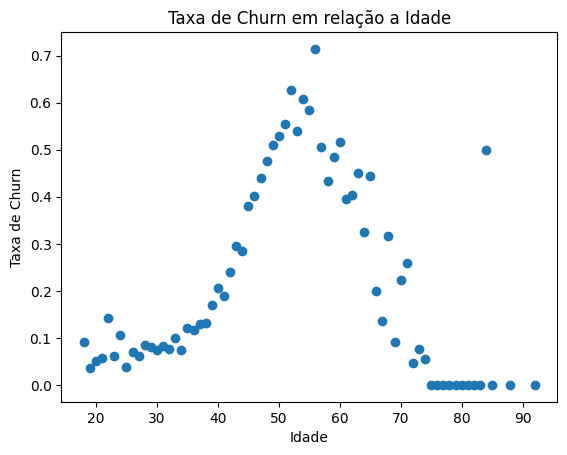

In [ ]:
df_plot = df.groupby ('Age'). Exited.mean (). reset_index () 
#Número de produtos em relação a variável churn
x = df_plot['Age']
y = df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

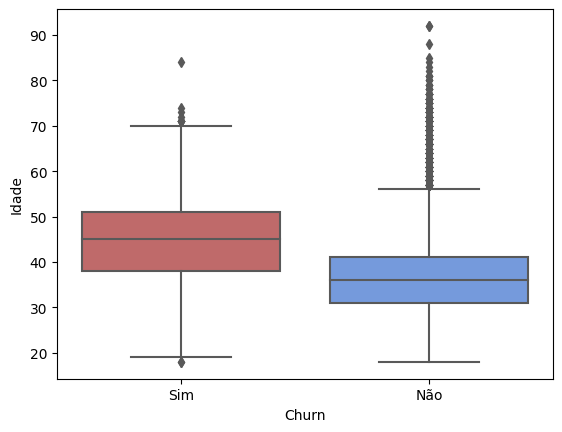

In [ ]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited_cat", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

Observa-se, pelo boxplot, que clientes que cancelaram o serviço têm uma idade maior do que os clientes que não cancelaram o serviço. E ainda analisando o boxplot, observa-se a presença de outliers (pontos discrepantes).

Pelo gráfico de dispersão, entre a taxa de Churn e a idade, observa-se que pessoas entre 50 e 60 anos tem uma alta taxa de Churn e clientes com mais de 75 anos tem risco quase zero de abandonar os serviços bancários.

* Variável Score de Crédito

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

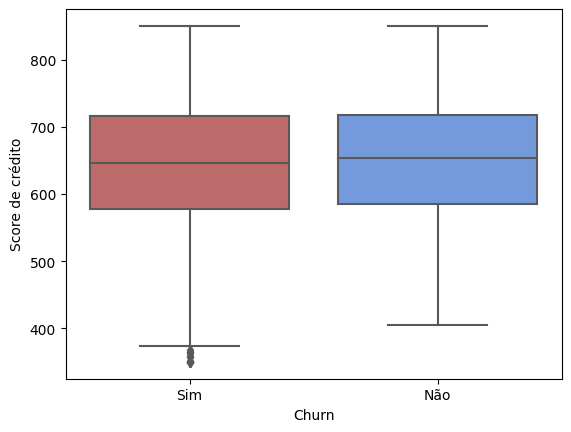

In [ ]:
#box-plot score do cliente em relação ao churn

sns.boxplot(x="Exited_cat", y="CreditScore" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
df.groupby(['Exited'])['CreditScore'].mean()

Text(0, 0.5, 'Taxa de Churn')

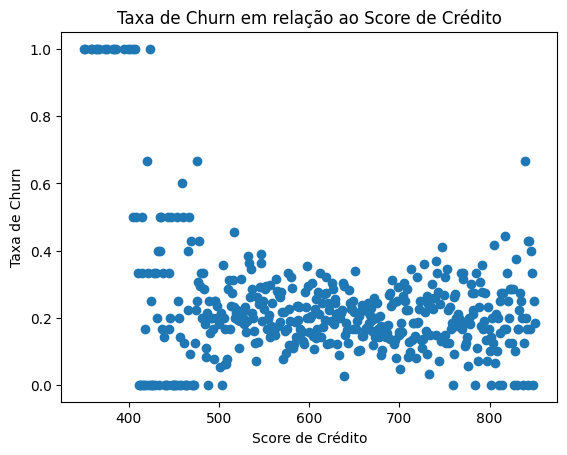

In [ ]:
#Número de produtos em relação a variável churn
df_plot = df.groupby ('CreditScore'). Exited.mean (). reset_index () 

x =df_plot['CreditScore']
y=df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')
     

Analisando o boxplot, a variável pontuação de crédito no geral não possui grandes diferença em relação ao Churn de clientes. Porém, o boxplot dos clientes que cancelaram o serviço, possuí observações outliers na parte inferior e um limite inferior menor do que o boxplot dos clientes que não cancelaram o contrato. Indicando assim, que clientes que cancelaram o serviço possuem um score menor do que os clientes que não cancelaram o serviço.

Quando observamos o gráfico de dispersão da taxa de Churn em relação a pontuação de crédito, essa evidência fica mais clara, a taxa de Churn é maior entre os clientes com baixo escore de crédito.

Ou seja, clientes com alto risco de serem inadimplentes também tem uma propensão maior de Churn.

# Conclusão 
Analisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço.


Observa-se que os clientes com uma alta taxa de Churn são aqueles clientes

* Da Alemanha,
* Do sexo feminino,
* Que não são membro ativo,
* Com alto número de produtos,
* Com score de crédito baixo,
* Com saldo bancário elevado,
* Com idade entre 50 e 60 anos.



Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

Nessa parte II, analisamos o perfil dos clientes que deram o Churn. A análise exploratória dos dados se mostrou extremamente útil para identificar o perfil de clientes em evasão dos serviçoes.

Agora, vamos implementar um modelo de ML pra prever o Churn

4. Pré-Processamento dos dados

Nessa seção precisamos transformar as variáveis para utilizá-las nos modelos de Machine Learning. Teremos as seguintes etapas

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados missing;
* Separação das variáveis categóricas, numéricas e resposta;
* Processamento variáveis categóricas;
* Processamento variáveis numéricas.

* Eliminar as variáveis que não serão utilizadas

Em conjunto de dados reais é comum existir variáveis que não tem utilidade prática, por exemplo, as variáveis ‘RowNumber’ (número da linha) e ‘CustomerId'(ID do Cliente) não trazem informações relevantes para entender o Churn de clientes. Assim, iremos eliminar essas variáveis utilizando a função drop().

In [ ]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])

* Identificando dados faltantes

Nada é perfeito nesse mundo e na análise de dados isso também é verdade. Dados faltantes, ou dados missing, são comuns em dados reais, isso pode ocorrer por vários motivos.

Por exemplo, a pessoa que fez o cadastro esqueceu de preencher essa informação, ou a dona da conta não tinha essa informação quando fez o cadastro, ou simplesmente essa informação era desconhecida.

Assim para identificar a presença de dados faltantes no conjunto de dados, utilizamos os comandos a seguir

In [ ]:
#Contato número de observações faltantes no dataset para cada variável
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Exited_cat         0
dtype: int64

Nenhuma variável em estudo apresenta dados faltantes (dados missing). Assim, não teremos o processo de tratamento dos dados faltantes.

* Separando as variáveis

No modelos de Machine Learning temos a variável dependente (variável resposta) que queremos “prever”, no nosso caso é a variável ‘Exited’. E as covariáveis (variáveis independentes)  são as variáveis que irão explicar o Churn.

Para não modificar a variável resposta (target) durante o pré-processamento, iremos separá-la das outras variáveis do dataset.

In [ ]:
#Criando variáveis independentes e dependentes
y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)

* Separando as variáveis numéricas das categóricas

Variáveis numéricas são aquelas variáveis que assumem valores numéricos, por exemplo a variável idade. As variáveis numéricas são classificadas como variáveis contínuas ou discreta.

As variáveis contínuas assumem valores na reta real, como a variável Salário Estimado. E as variáveis discretas são aquelas que assumem valores inteiros, como a variável número de produtos.

Variáveis categóricas são variáveis que não assumem valores numéricos. Por exemplo, a variável país.

As variáveis categóricas são classificadas como nominais e ordinais. As variáveis categóricas nominais são aquelas que não tem nenhuma ordem envolvida, por exemplo, a variável sexo e ordinais quando temos uma ordem envolvida, como a variável grau de escolaridade.

No pré processamento dos dados separamos as variáveis entre categóricas e numéricas, pois para cada tipo de variável utilizamos técnicas de processamento diferentes.

In [ ]:
#Variáveis Continuas
x_cont = ['CreditScore','Balance','Age','EstimatedSalary','Tenure']

In [ ]:
#Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies=X[x_cat]
x_dummies

,HasCrCard,Exited_cat,NumOfProducts,Geography,IsActiveMember,Gender
0,Sim,Sim,1,França,Sim,Feminino
1,Não,Não,1,Espanha,Sim,Feminino
2,Sim,Sim,3,França,Não,Feminino
3,Não,Não,2,França,Não,Feminino
4,Sim,Não,1,Espanha,Sim,Feminino
...,...,...,...,...,...,...
9995,Sim,Não,2,França,Não,Masculino
9996,Sim,Não,1,França,Sim,Masculino
9997,Não,Sim,1,França,Sim,Feminino
9998,Sim,Sim,2,Alemanha,Não,Masculino


* Processamento das variáveis categóricas
Algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas.

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino. Após aplicar a função, os valores serão transformados em 1 e 0.

In [ ]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited_cat
0,619,França,0,42,2,0.00,1,Sim,Sim,101348.88,Sim
1,608,Espanha,0,41,1,83807.86,1,Não,Sim,112542.58,Não
2,502,França,0,42,8,159660.80,3,Sim,Não,113931.57,Sim
3,699,França,0,39,1,0.00,2,Não,Não,93826.63,Não
4,850,Espanha,0,43,2,125510.82,1,Sim,Sim,79084.10,Não
5,645,Espanha,1,44,8,113755.78,2,Sim,Não,149756.71,Sim
6,822,França,1,50,7,0.00,2,Sim,Sim,10062.80,Não
7,376,Alemanha,0,29,4,115046.74,4,Sim,Não,119346.88,Sim
8,501,França,1,44,4,142051.07,2,Não,Sim,74940.50,Não
9,684,França,1,27,2,134603.88,1,Sim,Sim,71725.73,Não


Para as variáveis categóricas com mais categorias, utilizaremos o método get_dummies(). Esse método transforma uma variável em variável dummy, ou seja, ele cria novas colunas de variáveis transformando a variável em binária, ou seja, atribui 0 e 1s.

Por exemplo, a variável país possuí três categorias, França, Espanha e Alemanha. A função get_dummies() transforma cada categoria em uma nova variável binária, ou seja,

* Variável França: se o cliente for da França 1 e 0 caso contrário.
* Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
* Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.

Observe o conjunto de dados após aplicar a função get_dummies().

In [ ]:
x_final = pd.get_dummies (data = X, columns = ['Geography','NumOfProducts'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited_cat,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,Sim,Sim,101348.88,Sim,0,0,1,1,0,0,0
1,608,0,41,1,83807.86,Não,Sim,112542.58,Não,0,1,0,1,0,0,0
2,502,0,42,8,159660.80,Sim,Não,113931.57,Sim,0,0,1,0,0,1,0
3,699,0,39,1,0.00,Não,Não,93826.63,Não,0,0,1,0,1,0,0
4,850,0,43,2,125510.82,Sim,Sim,79084.10,Não,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,Sim,Não,96270.64,Não,0,0,1,0,1,0,0
9996,516,1,35,10,57369.61,Sim,Sim,101699.77,Não,0,0,1,1,0,0,0
9997,709,0,36,7,0.00,Não,Sim,42085.58,Sim,0,0,1,1,0,0,0
9998,772,1,42,3,75075.31,Sim,Não,92888.52,Sim,1,0,0,0,1,0,0


Observe que a variável país agora tem 3 colunas, para cada país temos uma coluna com valores 0 ou 1. Onde 1, significa que pertence aquele país.

* Modelo de Churn
Após o pré processamento, o conjunto de dados está pronto para a modelagem. Prever o Churn de clientes é um problema de classificação binária, 1 se Churn e 0 caso contrário.

Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost. Lembre-se a variável resposta Exited tem apenas 20% de valores 1. E por isso escolhemos modelos que não sofrem tanta influência dos dados desbalanceado.

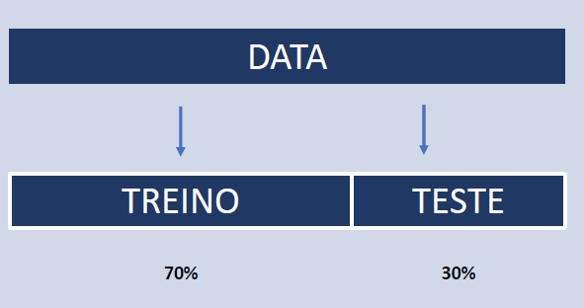

Para analisar a capacidade de generalização do modelo é importante separar o dataset em conjunto de dados de treino e dados de teste. O conjunto de dados de treino utilizamos para treinar o modelo e utilizaremos 75% dos conjunto de dados para isso.

O conjunto de dados de teste utilizamos para analisar o quanto o modelo está acertando para estimar as classes, 1 para Churn e 0 caso contrário. Essa etapa é necessária, para analisar como nosso modelo se comporta em dados desconhecidos.

A figura, exemplifica o método Holdout, onde temos os dados e dividimos em duas partes, uma para treinar o modelo e outra para testar o modelo em dados desconhecidos.

In [ ]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 
x_treino, x_teste, y_treino, y_teste  = train_test_split(x_final[x_cont], y, test_size = 0.25, random_state = 1)

* Variáveis Numéricas

Observe que as variáveis numéricas Balance, Estimated Salary, Age e Credit Score estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.

Para resolver esse problemas utilizaremos o método MiniMax para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.

O método MiniMax é definido como

valor_padronizado = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

Aqui utilizaremos uma função MinMaxScaler() do pacote sklearn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

In [ ]:
x_treino

array([[0.74      , 0.        , 0.45945946, 0.07349132, 0.7       ],
       [0.454     , 0.        , 0.18918919, 0.0490829 , 0.1       ],
       [0.712     , 0.        , 0.33783784, 0.15945158, 0.1       ],
       ...,
       [0.644     , 0.        , 0.36486486, 0.459958  , 0.9       ],
       [0.626     , 0.        , 0.28378378, 0.50569172, 0.8       ],
       [0.826     , 0.3992089 , 0.32432432, 0.16695697, 0.6       ]])

## Modelo KNN
Modelo mais simples de aprendizado supervisiona, mas nem por isso ele perde em relação ao seu desempenho.

KNN ou k-vizinhos mais próximo utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação. Para entender melhor esse algoritmo leia nosso artigo sobre o modelo KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino, y_treino)


KNeighborsClassifier()

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))
     

Predito     0    1   All
Real                    
0        1846  134  1980
1         388  132   520
All      2234  266  2500


Primeiramente utilizamos o K=5 que é default da função Knn do pacote sklearn, como comentado anteriormente, o valor de k influência bastante a estimação das classe. Observe, que utilizando k=5, temos muitos erros de predição.

Assim precisamos encontrar o melhor k para esses dados.

* Encontrando o melhor K

Para encontrar o melhor K, ajustaremos varios modelos variando o número de K, aquele modelo que retornar o menor erro de predição é o modelo com K ideal

In [ ]:
import numpy as np #manipulação algebricas

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_treino, y_treino)
    pred_i = knn.predict(x_teste)
    error.append(np.mean(pred_i != y_teste))

Na função acima, ajustei o modelo para diferentes k, variando k de 1 a 40. E depois calculei o número de erros de classificação e tirei a média, erro médio. A seguir, vou plotar os erros de predição para os diferentes k e aquele k com o menor erro, será o ajuste ideal.

Text(0, 0.5, 'Erro Médio')

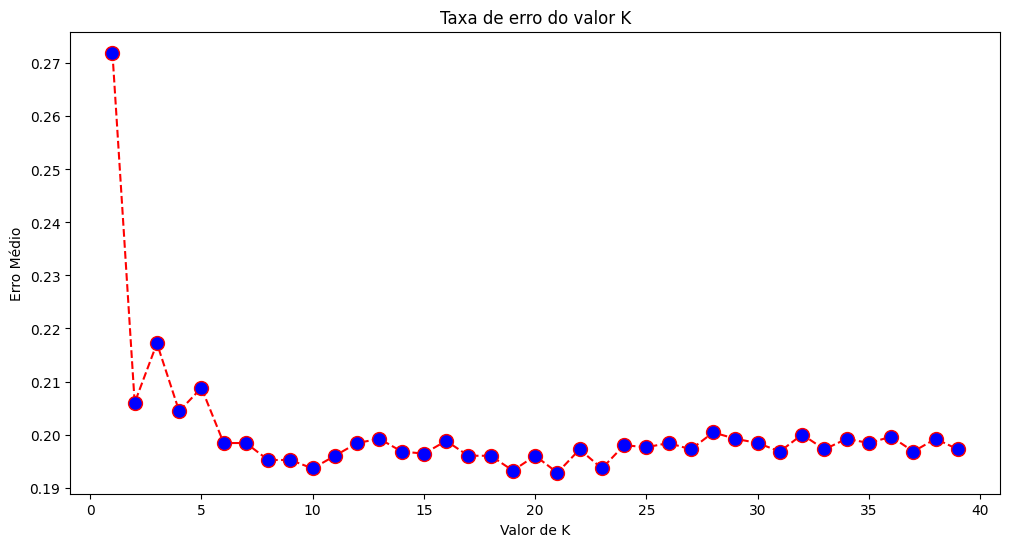

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

O melhor k=17, assim iremos ajustar novamente o modelo KNN considerando K=17.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=17)

Previsão na amostra teste e matriz de confusão

In [ ]:
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1924   56  1980
1         434   86   520
All      2358  142  2500


Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

Vamos tentar o modelo Random Forest para buscar um resultado melhor.

## Modelo Random Forest

In [ ]:
# Importe o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier
# Instancie o modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
# Treine o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);

In [ ]:
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1870  110  1980
1         377  143   520
All      2247  253  2500


O modelo de Random Forest conseguiu melhores resultados, porém ainda temos bastante falsos negativos. Vamos tentar um modelo mais robusto e que não sofre tanta influência em amostras desbalanceada.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1980
           1       0.57      0.28      0.37       520

    accuracy                           0.81      2500
   macro avg       0.70      0.61      0.63      2500
weighted avg       0.78      0.81      0.78      2500



# Como o modelo XGBoost funciona
O modelo XGBoost, vem do eXtreme Gradient Boosting, é uma categoria de modelos baseada nos algoritmos de árvores de decisão em combinação com os algoritmos de Gradient Boosting (gradiente aumentado). Além de ser um modelo robusto que não sofre tanta influência com dados desbalanceado.

Os modelos padrões em aprendizado supervisionado, como a Árvore de Decisão, simplesmente treina um único modelo nos dados de treinamento. Mesmo quando utilizamos o método Ensemble para combinar os modelos, estamos ajustando os modelos e fazendo previsões individualmente.

Os algoritmos de Boosting, mesmo sendo uma técnica de Ensemble, pois combina muitos modelos, utiliza um método mais inteligente. Onde os novos modelos adicionados tem o objetivo de corrigir os erros dos modelos anteriores. O algoritmo para quando não existe mais melhorias a ser feita.

Os algoritmos de Gradient Boosting são treinados para prever os resíduos dos modelos anteriores e tentar reduzir o mesmo, ou seja, utiliza o algoritmo Gradient Descent para minimizar os erros dos modelos anteriores.

Para ajustar o algoritmo XGBoost utilizamos a biblioteca xgboost. Não se assuste com a função do XGBClassifier( ). O modelo XGBoost tem muitos parâmetros e posteriormente faremos um artigo para explicar esses parâmetros.

No momento o que você precisa entender é a função, os parâmetros podem ser omitidos e o algoritmo utilizará os parâmetros default.

Porém após fazer alguns testes, os parâmetros apresentados a seguir, foram o que retornaram os melhores resultados.

In [ ]:
#Importando as bibliotecas necessárias
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)
 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

## Validação do modelo nos dados de teste

In [ ]:
#fazendo as predições no dados de teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))


Predito     0    1   All
Real                    
0        1832  148  1980
1         382  138   520
All      2214  286  2500


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1980
           1       0.48      0.27      0.34       520

    accuracy                           0.79      2500
   macro avg       0.65      0.60      0.61      2500
weighted avg       0.76      0.79      0.76      2500



Usando o XGBoost alcançamos uma acurácia de 86%. Apesar do Random Forest ter uma acurácia de 87%, escolhemos o XGBoost como o melhor modelo. Pois, o XGBoost foi o modelo que conseguiu prever melhor o Churn, a classe 1.

Observe que apesar da acurácia ser menor no XGBoost, todas as medidas referentes a classe 1 foi melhor no XGBoost. Lembre-se, a acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor.

Porém como o nosso objetivo era prever o Churn, o modelo XGBoost teve uma melhor performance nesse quesito.

### Analisando a importância das variáveis

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

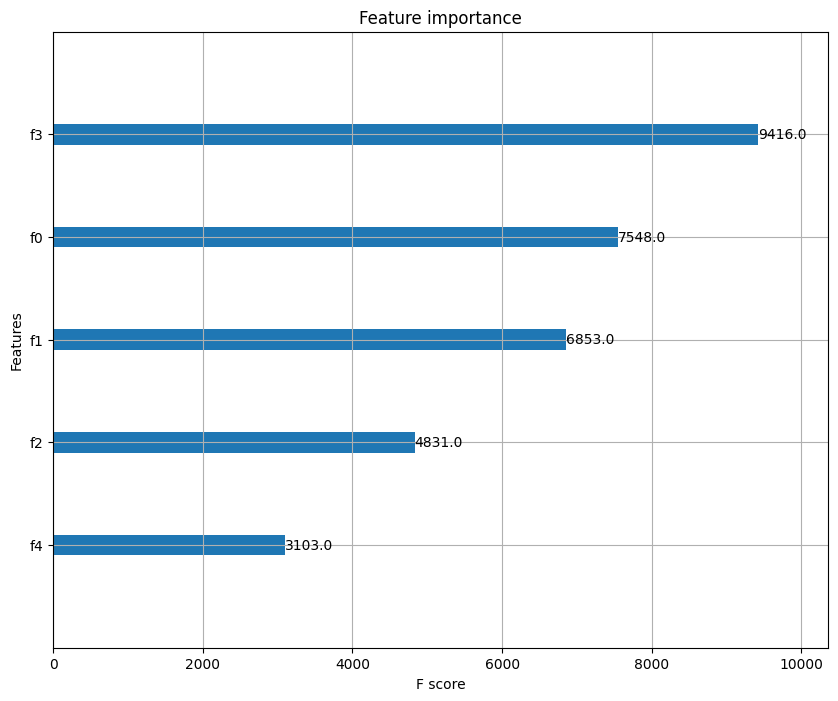

In [ ]:
#Analisando a importância de cada variável
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

As variáveis mais importante para estimar o Churn dos clientes foram: idade, saldo bancário, número de produtos, pontuação de crédito, estimativa de salário, membro ativo e país Alemanha.

# Métodos Ensemble
Para tentar melhorar a previsão do Churn, vamos combinar os dois melhores modelos, Random Forest e XGBoost, utilizando o método Ensemble.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier with soft voting 
voto = VotingClassifier(estimators=[('rf', rf),('xgb',xgb)], voting='soft')
voto = voto.fit(x_treino,y_treino)


In [ ]:
y_predito = voto.predict(x_teste)
print (pd.crosstab(y_teste,y_predito, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1850  130  1980
1         390  130   520
All      2240  260  2500


In [ ]:
print(classification_report(y_teste, y_predito))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1980
           1       0.50      0.25      0.33       520

    accuracy                           0.79      2500
   macro avg       0.66      0.59      0.61      2500
weighted avg       0.76      0.79      0.76      2500



# CONCLUSÃO PARTE II: Modelo de Churn
O modelo XGBost e Random Forest se mostraram eficiente para prever a probabilidade do Churn dos clientes. As variáveis mais importante para prever o Churn foram a idade do cliente, o saldo bancário e o número de produtos, ou seja, quanto maior o produto maior o risco de Chun.

O modelo final, foi a combinação dos modelos XGBoost e Random Forest. Com modelo de Churn podemos prever clientes com a maior chance de cancelar o serviço e assim tomar medidas preventivas, afim de evitar essa saída.

Podemos melhorar a predição desse modelo categorizando as variáveis contínuas e balanceando as amostras, mas isso é assunto para um próximo artigo.
